Import libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Mounted at /content/drive


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [4]:
df1 = pd.read_csv('/content/drive/MyDrive/finalproject/merged_data.csv')

Split the data

In [5]:
df2 = df1
cols = ['FSO_Att','RFL_Att']
x = df2.drop(cols, axis=1)

In [6]:
y1 = df1['FSO_Att']
y2 = df1['RFL_Att']

In [7]:
temp1 = [0, 1, 2, 3, 5, 6, 7, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22]
temp2 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19]
x1 = x.iloc[:, temp1]
x2 = x.iloc[:, temp2]

Training and testing the generic method

In [8]:


def eval_reg(X, y, n_estimators=100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model = ExtraTreesRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    return r2, rmse

In [9]:
fso = eval_reg(x1, y1, n_estimators=100)
rfo = eval_reg(x2, y2, n_estimators=100)

In [10]:
print(fso)
print(rfo)

(0.9174150677136512, 1.2952687757525243)
(0.9393623908551071, 0.6630436567901958)


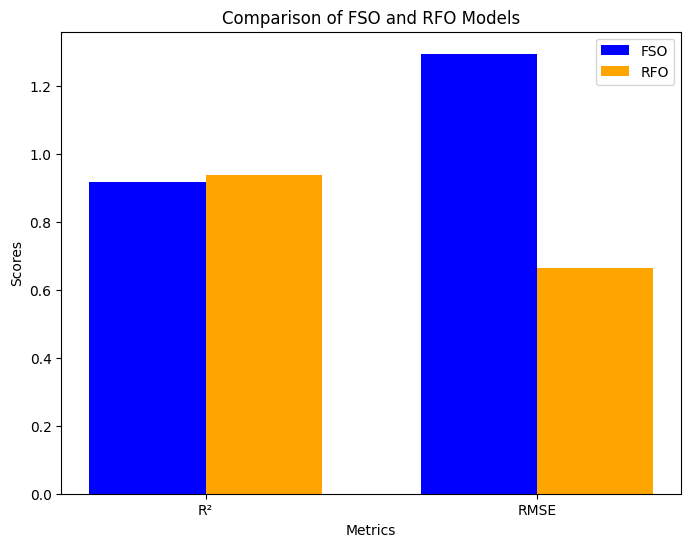

In [11]:
fso_r2, fso_rmse = fso
rfo_r2, rfo_rmse = rfo

labels = ['R²', 'RMSE']
fso_values = [fso_r2, fso_rmse]
rfo_values = [rfo_r2, rfo_rmse]

width = 0.35
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(8, 6))

bars1 = ax.bar(x - width/2, fso_values, width, label='FSO', color='blue')
bars2 = ax.bar(x + width/2, rfo_values, width, label='RFO', color='orange')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of FSO and RFO Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

Hypertuning the model

In [17]:


def hypertune(X, y, param_grid, cv=5, n_jobs=-1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model = ExtraTreesRegressor(random_state=42)
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=cv,
        n_jobs=n_jobs,
        scoring='neg_mean_squared_error',
        verbose=2
    )
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    y_pred = best_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    return best_model, best_params, best_score, r2, rmse
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10, 20],
    'bootstrap': [True, False]
}




In [18]:
fso1 = hypertune(x1, y1, param_grid, cv=5, n_jobs=-1)
rfo1 = hypertune(x2, y2, param_grid, cv=5, n_jobs=-1)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


In [19]:
print(fso1)
print(rfo1)

(ExtraTreesRegressor(n_estimators=400, random_state=42), {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}, -1.4075702461632549, 0.8447406218939243, 1.0609624441518286)
(ExtraTreesRegressor(max_depth=20, n_estimators=500, random_state=42), {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}, -0.5823268729199066, 0.937732906913184, 0.6718934163331022)
